In [41]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tech_support_df = pd.read_csv("tech_support_data.csv")

In [3]:
tech_support_df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [4]:
tech_support_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [5]:
tech_support_num_df = tech_support_df.drop("PROBLEM_TYPE",axis=1)

In [8]:
tech_support_num_df

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.00,75,25
1,12,2.0,150,0.01,0.50,5,95
2,5,1.0,35,0.02,0.20,90,10
3,3,2.0,8,0.01,0.70,5,95
4,45,2.3,54,0.15,0.00,99,1
5,47,3.1,132,0.30,0.03,100,0
6,12,4.0,154,0.02,0.05,100,0
7,165,1.2,32,0.03,0.00,95,5
8,321,1.0,5,0.21,0.00,60,40
9,22,3.3,140,0.14,0.01,95,5


In [12]:
tech_support_num_df = tech_support_num_df.apply(zscore)
tech_support_num_df

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


In [15]:
tech_support_df = tech_support_num_df.join(tech_support_df["PROBLEM_TYPE"])
tech_support_df

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449,AC stops abruptly
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449,App hangs while entring commands
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572,App takes a long time to initialize
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563,Unable to connect the App to the device
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572,Reinstalling the app hangs the phone


KMeans Cluster - Grouping data into clusters

In [36]:
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    KMeans_model = KMeans(n_clusters=k)
    KMeans_model.fit(tech_support_num_df)
    meanDistortions.append(sum(np.min(cdist(tech_support_num_df,KMeans_model.cluster_centers_,"euclidean"),axis=1))/tech_support_num_df.shape[0])

In [37]:
meanDistortions

[2.5132186215720433,
 2.0110698079486484,
 1.633958126099869,
 1.4632577627349272,
 1.2297581575971248,
 1.0620842732423295,
 0.9815040637871222,
 0.8636657490946981,
 0.7580018332708841]

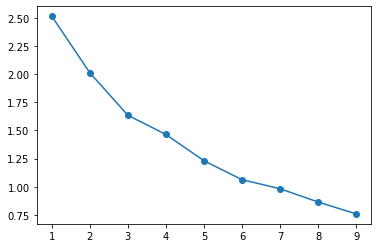

In [40]:
plt.plot(clusters,meanDistortions,'-o')

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the fut

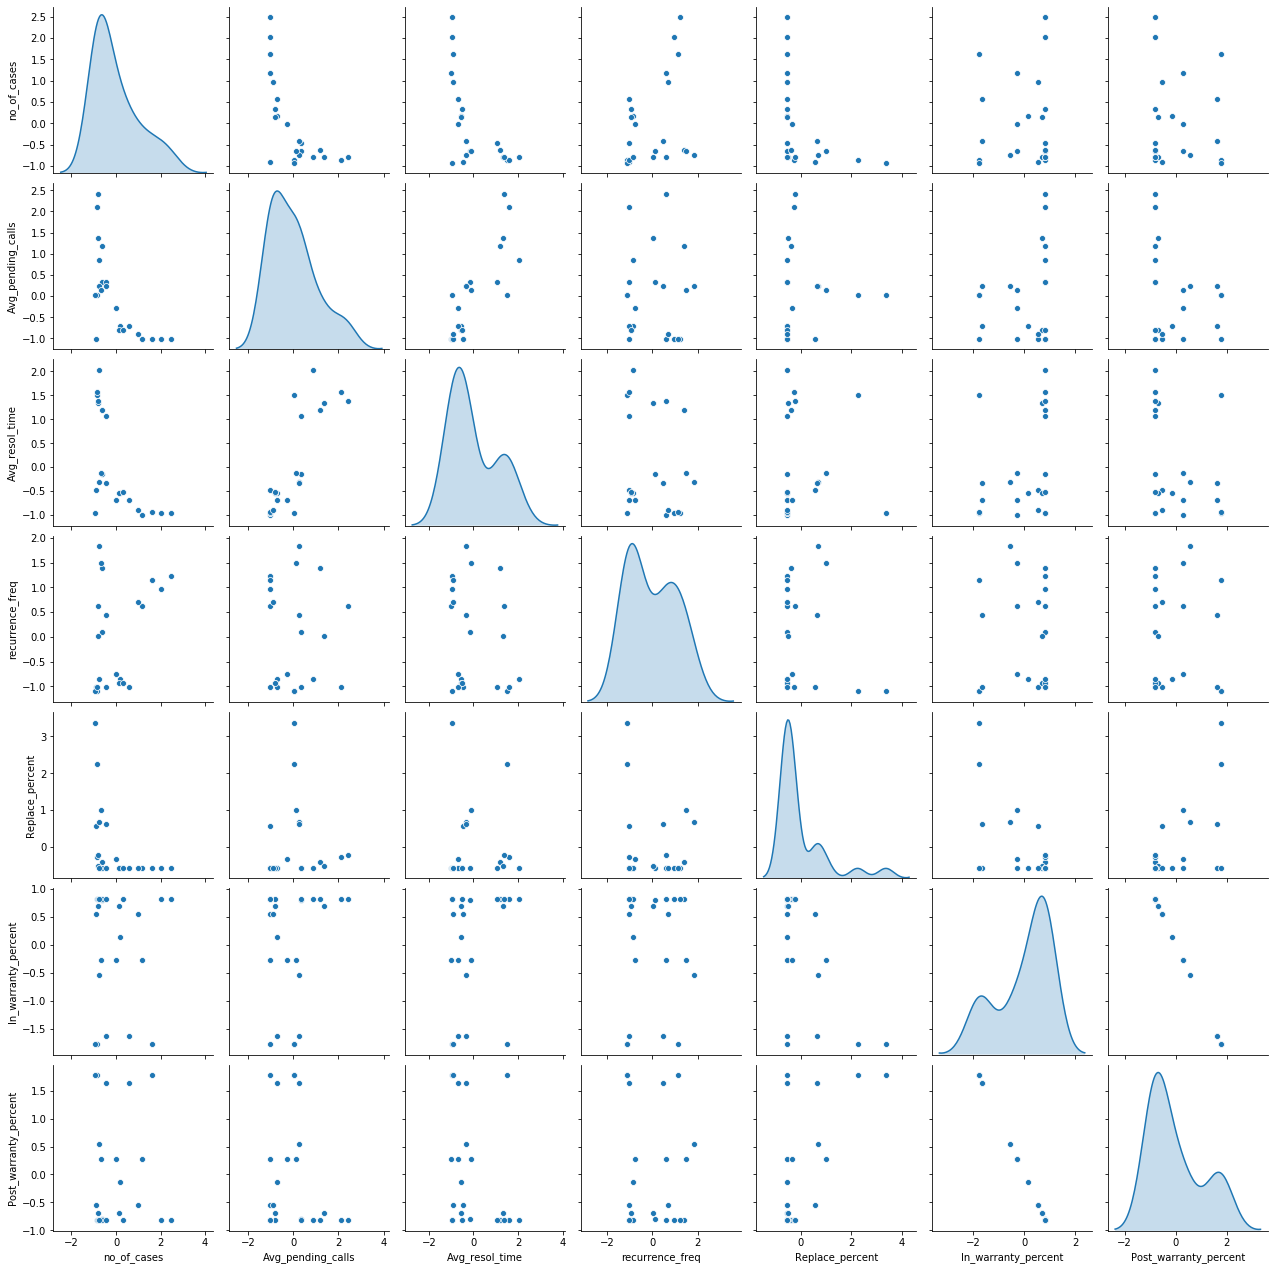

In [43]:
sns.pairplot(tech_support_num_df,diag_kind="kde")

In [44]:
KMeans_model = KMeans(n_clusters=3)
KMeans_model.fit(tech_support_num_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
cluster_prediction = KMeans_model.predict(tech_support_num_df)

In [48]:
tech_support_df["Cluster_Group"] = cluster_prediction

In [50]:
tech_support_df

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE,Cluster_Group
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working,0
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit,1
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working,0
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on,1
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password,0
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449,AC stops abruptly,2
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449,App hangs while entring commands,2
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572,App takes a long time to initialize,0
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563,Unable to connect the App to the device,0
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572,Reinstalling the app hangs the phone,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E709BA2860>,
      dtype=object)

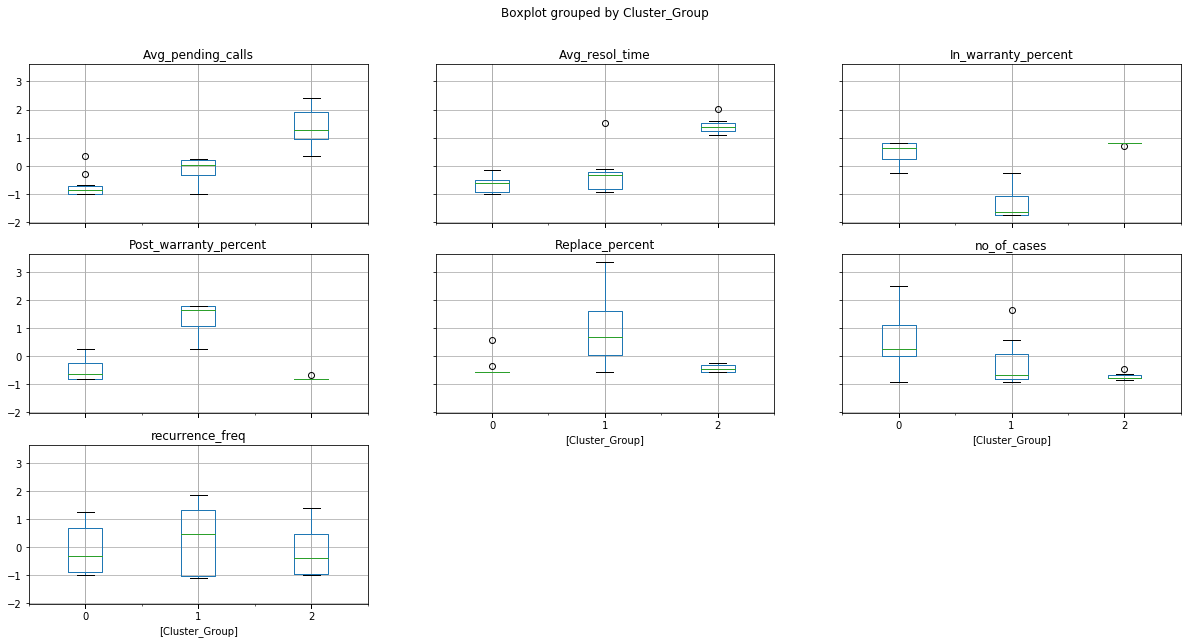

In [52]:
tech_support_df.boxplot(by="Cluster_Group",figsize=(20,10))